
<h1 style="color:#ff6347; text-align:center;margin-bottom:20px"> Филтрирање на слика во фрекфенциски домен </h1>

 <div style="color:black"> За да филтрираме слика во фреквенциски домен потребно е да ја помножиме сликата во фреквенциски домен со филтерот (кернел) кој е исто така во фреквенциски домен.
 \begin{equation} I_{f,filt} = HI_f \end{equation}
 
 За таа цел потребно е да се вметне Octave функција која ќе креира “Band pass gaussian filter” во фреквенциски домен. Bandpass гаусовиот филтер во фреквенциски домен е дефиниран со равенката:

\begin{equation} H(i,j) = e^{\frac{d(i,j)^2}{f_h^2}} (1 - e^{\frac{d(i,j)^2}{f_l^2}}) \end{equation}

Каде што 𝑑(𝑖,𝑗) е евклидовото растојанието на даден пиксел од центарот на сликата, додека 𝑓ℎ и 𝑓𝑙 се праговите на високите и ниските фреквенции кои сакаме
да ги филтрираме.

Конверзија на 2D сликата од просторен во фреквенциски домен се прави со користење на Фуриева трансформација. Фуриевата трансформација е дефинирана
како:

\begin{equation} F(u,v) = \iint \limits_{-\infty}^{\infty} f(x,y)e^{-i2\pi(ux+vy)}dxdy   \end{equation}

А во дискретниот домен горната равенка може да биде преведена како:

\begin{equation} F(u,v) = \mathop{\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty}} f[m,n]\cdot e^{-i2\pi(ux+vy)}dudv                          \end{equation}

Конверзија на 2D сликата од фреквенциски во просторен домен се прави со користење на инверзна Фуриева трансформација. Инверзната Фуриева
трансформација е дефинирана како:

\begin{equation} F(x,y) = \iint \limits_{-\infty}^{\infty} f(u,v) e^{-i2\pi(ux+vy)}dudv   \end{equation}

А во дискретниот домен горната равенка може да биде преведена како:

\begin{equation} F(x,y) = \mathop{\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty}} f[m,n] \cdot e^{-i2\pi(xmu_0+ynv_0)}                        \end{equation}

<div>
   

In [23]:
%%capture
%matplotlib inline
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt
import warnings

from skimage.morphology import disk
from skimage.filters import rank
from skimage.color import rgb2gray
import skimage.data


def f(Median_Size):
    selem = disk(int(Median_Size))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        img_median = rank.median(img_gray, selem=selem) 

    ax_neu.imshow(img_median, cmap="gray")
    fig.canvas.draw()
    display(fig)

image = plt.imread("https://homepages.cae.wisc.edu/~ece533/images/barbara.png")       
img_gray = rgb2gray(image)

fig = plt.figure(figsize=(11, 13))
ax_orig = fig.add_subplot(121) 
ax_neu = fig.add_subplot(122) 

ax_orig.imshow(img_gray, cmap="gray")
ax_neu.imshow(img_gray, cmap="gray")





interactive(children=(IntSlider(value=1, description='Frequency cutoffs', max=10, min=1), Output()), _dom_clas…

(Text(0.5, 1.0, 'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

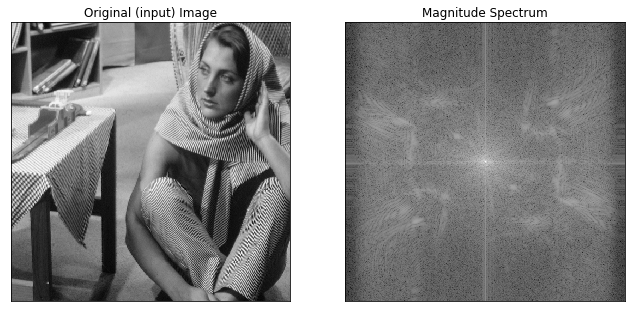

In [24]:
interact(f, Median_Size=widgets.IntSlider(min=1,max=10,step=1,value=1, description='Frequency cutoffs'));


dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)

# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)

# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Original (input) Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

